In [ ]:
# from drive
#!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

Archive:  ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip
   creating: dataset/tfrecords/
   creating: dataset/tfrecords/valid/
  inflating: dataset/tfrecords/valid/file_valid_02-1551.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_01-2048.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_00-2048.tfrec  
   creating: dataset/tfrecords/train/
  inflating: dataset/tfrecords/train/file_train_21-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_00-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_47-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_50-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_25-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_20-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_62-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_52-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_36-2048.tfrec  
  inflating: dataset/tfrecords/train/file_trai

* Import modules

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')

In [ ]:
from configs import default_config as cfg
from model.hourglass import HourGlassNet
from dataset_builder import DatasetBuilder

* Model

In [ ]:
HG = HourGlassNet(cfg.NUM_KEYPOINTS, cfg.HG_NUM_STACKS, cfg.HG_NUM_FILTERS, 
              (cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, 3), 
              (cfg.LABEL_HEIGHT, cfg.LABEL_WIDTH, cfg.NUM_KEYPOINTS))
model = HG.create_hg_model()

Created HourGlassmodel:
    1. 4 stacks.
    2. 12080324 parameters. Call object.get_summary() for more detail.
    


In [ ]:
def compile_model_from_checkpoint(model, ckpt_path, optimizer, loss):
  ''' This function to load model only so optimizer and loss dont really matter
  Be cautious if use this model for training
  :param model:
  :param ckpt_path: should be anything before and '.ckpt'
  :param optimizer: 
  :param loss: applied for all outputs
  :Not support metrics yet
  :return a compiled tensorflow model
  '''
  model.load_weights(ckpt_path)
  model.compile(optimizer = optimizer, loss = loss)
  return model

In [ ]:
model = compile_model_from_checkpoint(model, 'drive/MyDrive/storage/1/checkpoints/best_val_loss_weights.ckpt',
                                 optimizer = tf.keras.optimizers.Adam(),
                                 loss = tf.keras.losses.MeanSquaredError())

* Dataset

In [ ]:
ds_builder = DatasetBuilder(cfg)

Train dataset with 66 tfrecords and 134214 examples.
Valid dataset with 3 tfrecords and 5647 examples.


In [ ]:
ds = ds_builder.get_ds_prediction()

In [ ]:
it = iter(ds)

In [ ]:
imgs_batch, meta = next(it)

In [ ]:
imgs_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.6431373 , 0.6431373 , 0.44705886],
        [0.6550858 , 0.65906864, 0.46498165],
        [0.6687807 , 0.6766238 , 0.49080884],
        ...,
        [0.6359988 , 0.5411765 , 0.25591302],
        [0.63529414, 0.5450368 , 0.2509804 ],
        [0.63529414, 0.54901963, 0.2509804 ]],

       [[0.6431373 , 0.6431373 , 0.44705886],
        [0.6560971 , 0.66007996, 0.46801546],
        [0.67041427, 0.6782574 , 0.49570963],
        ...,
        [0.63456744, 0.53305525, 0.2570332 ],
        [0.6372544 , 0.54004264, 0.25300294],
        [0.639277  , 0.5450368 , 0.2509804 ]],

       [[0.6431373 , 0.64243263, 0.4477635 ],
        [0.65707725, 0.66071326, 0.47130272],
        [0.67212415, 0.6799673 , 0.5005862 ],
        ...,
        [0.6321672 , 0.517829  , 0.25569662],
        [0.64054173, 0.5305944 , 0.25632852],
        [0.6459559 , 0.53835785, 0.25520834]],

       ...,

       [[0.19678311, 0.11443015, 0.10266545],
        [0.20

In [ ]:
meta['ann_id']

<tf.Tensor: shape=(16,), dtype=int64, numpy=
array([ 230831,  442619,  559508,  560228,  439117,  514577,  538081,
       1234574, 1245349, 1259139, 1269164, 1303041, 1304800, 1306228,
       1311471, 1316935])>

In [ ]:
pred = model.predict(imgs_batch)

In [ ]:
pred_kp = pred[-1][0][:, :, 0]

In [ ]:
pred_kp = tf.convert_to_tensor(pred_kp, dtype = tf.float32)

In [ ]:
pred_kp

<tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[1.0238431e-06, 1.7916472e-06, 9.9849603e-07, ..., 9.0792361e-07,
        1.1943335e-06, 7.0439950e-07],
       [8.0683043e-07, 1.2252686e-06, 1.0315966e-06, ..., 9.5756582e-07,
        1.4161720e-06, 8.2205196e-07],
       [4.0997386e-07, 8.5543979e-07, 1.0073683e-06, ..., 3.1179175e-07,
        1.1034103e-06, 3.3664568e-07],
       ...,
       [5.8130471e-08, 6.6193508e-08, 6.9200645e-08, ..., 3.1172129e-07,
        5.9721089e-07, 6.6129246e-07],
       [1.0758102e-08, 1.6045249e-08, 9.1482555e-09, ..., 3.6965116e-07,
        2.4820378e-07, 2.6299278e-07],
       [9.8031023e-09, 9.8827400e-09, 8.5424299e-09, ..., 9.4168939e-07,
        5.0999262e-07, 3.2733945e-07]], dtype=float32)>

In [ ]:
truth_kp = hms_batch[0][:,:,0]

In [ ]:
truth_kp

<tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

Text(0.5, 1.0, 'Predicted')

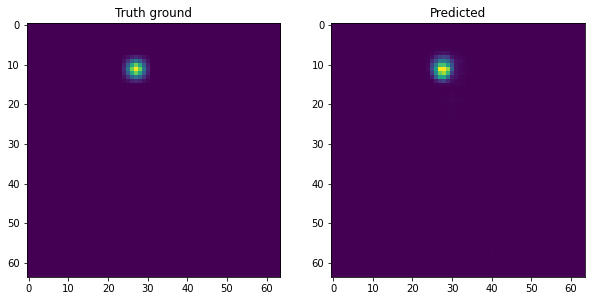

In [ ]:
fig = plt.figure(figsize=(10, 10))
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(truth_kp)
plt.title('Truth ground')

fig.add_subplot(rows, cols, 2)
plt.imshow(pred_kp)
plt.title('Predicted')

- Test losses

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
mse(hms_batch, tf.convert_to_tensor(pred[-1])).numpy()

0.0007164873

In [ ]:
def MSE(truth, pred):
  return tf.reduce_mean(tf.math.square(truth - pred))

In [ ]:
print(MSE(hms_batch, tf.convert_to_tensor(pred[-1])))

tf.Tensor(0.00071648735, shape=(), dtype=float32)


In [ ]:
weights = tf.cast(truth_kp > 0, dtype = tf.float32)
weights

<tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
def weighted_mean_squared_error(truth, pred):
  weights = tf.cast(truth > 0, dtype = tf.float32)*81 + 1
  return tf.reduce_mean(tf.math.square(truth - pred) * weights)

In [ ]:
print(weighted_mean_squared_error(hms_batch, tf.convert_to_tensor(pred[-1])))

tf.Tensor(0.00053820707, shape=(), dtype=float32)


* Predict whole dataset

In [ ]:
def find_max_coordinates_v1(heatmap):
  '''
  :param heatmap: shape(64, 64)
  :return x, y coordinate and confidence [0.0, 1.0] of ONE heatmap
  '''
  flatten_heatmap = tf.reshape(heatmap, (64*64, 17))
  indices = tf.math.argmax(flatten_heatmap, axis = 0)
  x = indices%64
  y = indices//64
  conf = tf.math.reduce_max(flatten_heatmap, axis = 0)
  return x, y, conf

In [ ]:
def heatmaps_to_keypoints_v1(heatmaps):
  '''
  :param heatmaps: shape(64, 64, number of keypoints)
  :return np.array
  '''
  flattened_heatmaps = tf.reshape(heatmaps, (64*64, 17)).numpy()
  keypoints = np.zeros(shape=(17, 3), dtype=np.float32)
  for i in range(17):
    heatmap = flattened_heatmaps[:, i]
    index = np.argmax(heatmap)
    x = index%64
    y = index//64
    conf = heatmap[y*64 + x]
    keypoints[i, 0] = x
    keypoints[i, 1] = y
    keypoints[i, 2] = conf
  return keypoints

In [ ]:
'''Input already a numpy'''
def heatmaps_to_keypoints_v2(heatmaps):
  flattened_heatmaps = tf.reshape(heatmaps, (64*64, 17)).numpy()
  heatmaps_np = heatmaps
  keypoints = np.zeros(shape=(17, 3), dtype=np.float32)
  for i in range(17):
    heatmap = flattened_heatmaps[:, i]
    index = np.argmax(heatmap)
    x = index%64
    y = index//64
    conf = heatmap[y*64 + x]

    # 3x3 patch
    padded_heatmaps = np.pad(heatmaps, [[1,1],[1,1],[0,0]])
    max_x = x + 1 # adjust because of pad
    max_y = y + 1
    patch = padded_heatmaps[max_y-1: max_y+2, max_x-1: max_x+2, i]
    patch[1][1] = 0
    patch_index = np.argmax(patch)
    patch_x = patch_index%3
    patch_y = patch_index//3
    delta_x = patch_x - 1
    delta_y = patch_y - 1
    delta_conf = conf - patch[patch_y][patch_x]

    keypoints[i, 0] = x + delta_x/4
    keypoints[i, 1] = y + delta_y/4
    keypoints[i, 2] = conf + delta_conf/4

  # need to clip just for sure
  clipped_keypoints = np.clip(keypoints, 0, 64)
  
  return clipped_keypoints


In [ ]:
x = np.zeros((3, 3))
x[1, 2] = 1
x[2, 1] = 1
print(x)
np.argmax(x)

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


5

In [ ]:
keypoints = heatmaps_to_keypoints_v1(pred[-1][0])
print(keypoints)

[[2.8000000e+01 1.1000000e+01 9.0268403e-02]
 [2.8000000e+01 1.0000000e+01 4.4333667e-02]
 [2.9000000e+01 1.0000000e+01 4.2882413e-02]
 [2.9000000e+01 1.0000000e+01 2.9917699e-01]
 [2.9000000e+01 1.0000000e+01 2.5703180e-01]
 [3.2000000e+01 1.4000000e+01 5.4537487e-01]
 [3.3000000e+01 1.4000000e+01 5.1031917e-01]
 [3.1000000e+01 2.1000000e+01 3.0382201e-01]
 [3.1000000e+01 2.1000000e+01 2.5621593e-01]
 [2.4000000e+01 2.7000000e+01 3.6974943e-01]
 [2.4000000e+01 2.7000000e+01 3.1860381e-01]
 [3.5000000e+01 3.2000000e+01 4.0329629e-01]
 [3.6000000e+01 3.1000000e+01 3.7048143e-01]
 [3.5000000e+01 4.3000000e+01 4.0291691e-01]
 [3.6000000e+01 4.3000000e+01 3.9745432e-01]
 [3.8000000e+01 5.5000000e+01 4.1006345e-01]
 [3.8000000e+01 5.5000000e+01 3.6029038e-01]]


In [ ]:
def create_oks_obj(ann_id, image_id, pred_kpts, score):
  oks_obj = {}
  oks_obj['image_id'] = image_id
  oks_obj['ann_id'] = ann_id
  oks_obj['category_id'] = 1
  oks_obj['keypoints'] = pred_kpts
  oks_obj['score'] = score
  return oks_obj

In [ ]:
def gen_predictions_list(model, ds, ds_length, batch_size, heatmaps_to_keypoints_func):
  num_iterations = int(np.ceil(ds_length/batch_size))
  it = iter(ds)
  list_of_prediction = []
  for i in range(num_iterations):
    images_batch, meta = next(it)
    pred = model.predict(images_batch)
    # need index j since meta is a dict that each item contains (batch_size) tensors
    for j, p in enumerate(pred[-1]): # only last output of the model
      # Each p is an example/instance

      # Get keypoints and undo them into original shape
      keypoints = heatmaps_to_keypoints_func(p)
      original_width = int(meta['original_width'][j])
      original_height = int(meta['original_height'][j])
      bbox_x = float(meta['bbox_x'][j])
      bbox_y = float(meta['bbox_y'][j])
      offset_width = float(meta['offset_width'][j])
      offset_height = float(meta['offset_height'][j])
      x_coords = keypoints[:, 0] * (original_width/64) + (bbox_x - offset_width)
      y_coords = keypoints[:, 1] * (original_height/64) + (bbox_y - offset_height)
      coco_kpts = []
      for x, y in zip(x_coords, y_coords):
        coco_kpts.append(int(x))
        coco_kpts.append(int(y))
        coco_kpts.append(1) # visible flag should be 1

      # Get score
      score = float(np.mean(keypoints[:, 2])) # need to convert to python float

      # Get other meta data for oks objt
      ann_id = int(meta['ann_id'][j])
      image_id = int(meta['image_id'][j])
      
      # oks object
      oks = create_oks_obj(ann_id, image_id, coco_kpts, score)
      list_of_prediction.append(oks)
      
  return list_of_prediction

In [ ]:
list_of_prediction = gen_predictions_list(model, ds, ds_builder.num_valid_examples, 16, heatmaps_to_keypoints_v2)

In [ ]:
print(len(list_of_prediction))
print(ds_builder.num_valid_examples)

5647
5647


In [ ]:
list_of_prediction[0]

{'ann_id': 230831,
 'category_id': 1,
 'image_id': 139,
 'keypoints': [427,
  169,
  1,
  428,
  167,
  1,
  430,
  167,
  1,
  431,
  167,
  1,
  431,
  167,
  1,
  439,
  177,
  1,
  441,
  177,
  1,
  436,
  196,
  1,
  436,
  196,
  1,
  417,
  213,
  1,
  417,
  213,
  1,
  447,
  225,
  1,
  449,
  223,
  1,
  447,
  255,
  1,
  449,
  255,
  1,
  454,
  288,
  1,
  454,
  288,
  1],
 'score': 0.3194946050643921}

In [ ]:
from urllib.request import urlopen
import json

In [ ]:
kpts = list_of_prediction[0]['keypoints']
x = [kpts[i] for i in range(len(kpts)) if i%3 == 0]
y = [kpts[i] for i in range(len(kpts)) if i%3 == 1]

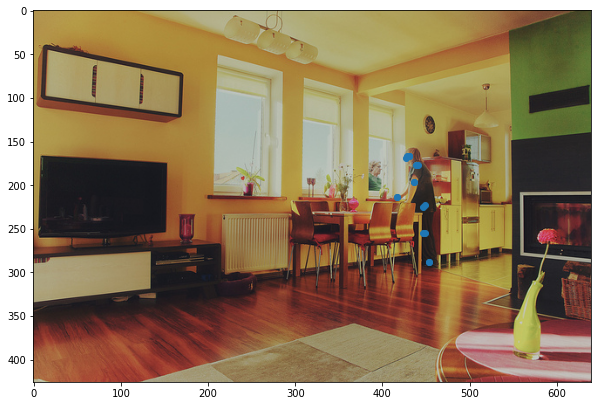

In [ ]:
f = urlopen("http://images.cocodataset.org/val2017/000000000139.jpg")
a = plt.imread(f, format = 'jpeg')
plt.figure(figsize =(10,10))
plt.imshow(a)
plt.scatter(x , y , marker = "o") # for heatmap size
plt.show()

In [ ]:
with open("result.json", "w") as outfile:
    json.dump(list_of_prediction, outfile)

In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [ ]:
cocoGt= COCO('/content/drive/MyDrive/single-person-pose-estimation/dataset/annotations/person_keypoints_val2017.json')

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [ ]:
cocoDt = cocoGt.loadRes('result.json')

Loading and preparing results...
DONE (t=23.97s)
creating index...
index created!


In [ ]:
image_ids = []
for p in list_of_prediction:
  image_ids.append(p['image_id'])

In [ ]:
annType = "keypoints"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds = image_ids
cocoEval.params.catIds = [1] # Person category
cocoEval.evaluate()
cocoEval.accumulate()
print('\nSummary: ')
cocoEval.summarize()

Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=2.76s).
Accumulating evaluation results...
DONE (t=0.08s).

Summary: 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.515
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.352
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.623
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.350
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.411


In [ ]:
 stats = cocoEval.stats
 stats

array([0.25867954, 0.51355785, 0.24331031, 0.25154624, 0.27945228,
       0.34714263, 0.62052776, 0.3446657 , 0.30740331, 0.4042237 ])